# Getting Price of Bitcoin

In [1]:
import json
import time
from datetime import datetime
import copy
import sys
from IPython.display import clear_output, Image

import random
import matplotlib.pyplot as plt
import numpy as np
  
from hashlib import sha256
import hashlib
import nacl.encoding
import nacl.signing

import requests
response = requests.get("https://api.coinbase.com/v2/prices/spot?currency=INR")
print(response.text)

{"data":{"base":"BTC","currency":"INR","amount":"2706414.27908215"}}


# Hashing text (SHA-256)

In [2]:
# Hash functions expect bytes as input: the encode() method
#turns strings to bytes

input_bytes = b"Booleaaannnnnnnnnnnnnnnnn"
output = hashlib.sha256(input_bytes)

# We use hexdigest() to convert bytes to hex because it's
#easier to read

print(output.hexdigest())

72521d39418837febda612e3cf73edb8b8b87466a4f570858cf44ebc2f843b4e


# Example of a block

# Blockchain with Proof-Of-Work
Here, we choose POW as first four digits of the output of the hash function to be zero.

In [12]:
class Blockchain(object):
    def __init__(self):
        self.chain = [{'index': 0,
                      'timestamp': '2009-01-03T23:45:47.066730',
                      'transactions': 'The Times 03/Jan/2009 Chancellor on brink of second bailout for banks.',
                      'previous_hash': None,
                      'nonsense': '000000000019d6689c085ae165831e934ff763ae46a2a6c172b3f1b60a8ce26f',
                      'hash': '387af2fc62d2b8ce8a5ca156f04dfc79b4b1246df4b1840472bf17417521f591'}]
        
        #self.pending_transactions = []
        
        # Create the genesis block
        print("Creating genesis block")
        #self.chain.append(self.new_block())
        
    
    def new_block(self):
        block = {
            'index': len(self.chain),
            'timestamp': datetime.utcnow().isoformat(),
            'transactions': current_transaction,
            'previous_hash': self.last_block["hash"] if self.last_block else None,
            'nonsense': format(random.getrandbits(64), "x") #Introduce a little anarchy
                }
        

        # Get the hash of this new block, and add it to the block
        block_hash = self.hash(block)
        block["hash"] = block_hash

        # Reset the list of pending transactions
        #self.pending_transactions ={}
        return block
    
    
    def print_chain(self):
        for x in self.chain:
            print()
            for y in self.chain[x['index']]:
                print (y,':',self.chain[x['index']][y])
        return

    @staticmethod
    def hash(block):
        # We ensure the dictionary is sorted or we'll have inconsistent hashes
        block_string = json.dumps(block, sort_keys=True).encode()
        return sha256(block_string).hexdigest()

    @property
    def last_block(self):
        # Returns the last block in the chain (if there are blocks)
        return self.chain[-1] if self.chain else None

    @staticmethod
    def valid_block(block,POW_condition):
        # Checks if a block's hash starts with POW_condition
            
        return block["hash"].startswith(POW_condition)

    def proof_of_work(self,POW_len):
        print("\n******* Mining *********")
        ti=time.time()
        POW_condition =""
        for i in range(POW_len):
            POW_condition  = POW_condition +"0"
        while True:
            new_block = self.new_block()
            if self.valid_block(new_block,POW_condition):
                break

        self.chain.append(new_block)
        
        print("\nFound a new block with starting with {} in: {} seconds".format(POW_condition,time.time()-ti))
        print("With the hash being = ", new_block["hash"])
        print("")
        return

In [ ]:
bc_POW_example = Blockchain()

In [ ]:
bc_POW_example.chain

In [ ]:
 for len_of_PoW in range(1,7):
    bc_POW_example.proof_of_work(len_of_PoW)


******* Mining *********

Found a new block with starting with 0 in: 0.0 seconds
With the hash being =  05f5fb7f49aa7ed811abb8f2efbe7c5b4fddeeb189dafcabe6bac06df8cf2ced


******* Mining *********

Found a new block with starting with 00 in: 0.021504640579223633 seconds
With the hash being =  00ff2dcd0ff5951178a4c28f82bd28002999c3520851c49e681e6193f71b0ce6


******* Mining *********

Found a new block with starting with 000 in: 0.1748180389404297 seconds
With the hash being =  000e03e7e2a980fa7f20382890d1a4ade6a46ebf9a4adf0b020c25db199c367e


******* Mining *********

Found a new block with starting with 0000 in: 2.346092700958252 seconds
With the hash being =  000086e6818142c4caf84ae9db45ab7fbb8687076416c301204d6d288ec929f4


******* Mining *********

Found a new block with starting with 00000 in: 18.0671603679657 seconds
With the hash being =  0000017c14333b9d75e3c7665fae4385e384c0ab330e57e4d53973478ba5da74


******* Mining *********

Found a new block with starting with 000000 in: 336.44659876823425 seconds
With the hash being =  000000080018e4701d3449692cab9219c41c5ba9f760fb285e1760ce2c689422


******* Mining *********

Found a new block with starting with 0000000 in: 8780.913450241089 seconds
With the hash being =  000000021fb64f77f9e4812346a51c8cede35045eab6a7647efadc658b27b207


# Elliptic Curve Digital Signatures Algorithm

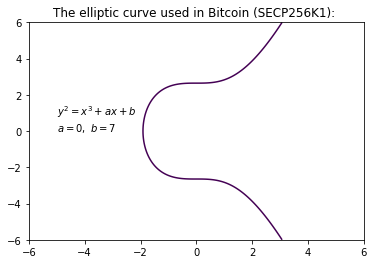

In [5]:
# Below are the public specs for Bitcoin's curve - the secp256k1
Pcurve = 2**256 - 2**32 - 2**9 - 2**8 - 2**7 - 2**6 - 2**4 -1       # A large prime
Acurve = 0; Bcurve = 7            # Parameters for curve: y^2 = x^3 + Acurve * x + Bcurve

Gx = 55066263022277343669578718895168534326250603453777594175500187360389116729240
Gy = 32670510020758816978083085130507043184471273380659243275938904335757337482424
GPoint = (Gx,Gy) # We choose this as our generator point

N=0xFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFEBAAEDCE6AF48A03BBFD25E8CD0364141 # Number of points in the field

#print("Number of points available in field is: ", int(N))
fig, ax = plt.subplots()
x_r=6
y, x = np.ogrid[-x_r:x_r:1000j, -x_r:x_r:1000j]
plt.contour(x.ravel(), y.ravel(), y**2 - x**3 - Acurve*x -Bcurve, [0])
plt.title(r"The elliptic curve used in Bitcoin (SECP256K1): ")
plt.annotate(r"$y^2 = x^3 + ax + b$" "\n" r"$a=0,\ b=7$",[-x_r//1.4,0])

plt.show()

In [16]:
def modinv(a,n=Pcurve): #Extended Euclidean Algorithm/'division' in elliptic curves
    lm, hm = 1,0
    low, high = a%n,n
    while low > 1:
        ratio = high//low
        nm, new = hm- lm*ratio, high- low*ratio
        lm, low, hm, high = nm, new, lm, low
    return lm % n

def ECadd(xp,yp,xq,yq): # Not true addition, invented for EC. It adds Point-P with Point-Q.
    m = ((yq-yp) * modinv(xq-xp,Pcurve)) % Pcurve
    xr = ((m*m)-xp-xq) % Pcurve
    yr = (m*(xp-xr)-yp) % Pcurve
    return (xr,yr)

def ECdouble(xp,yp): # EC point doubling,  invented for EC. It doubles Point-P.
    LamNumer = 3*xp*xp+Acurve
    LamDenom = 2*yp
    Lam = (LamNumer * modinv(LamDenom,Pcurve)) % Pcurve
    xr = ((Lam*Lam)-(2*xp)) % Pcurve
    yr = ((Lam*(xp-xr))-yp) % Pcurve
    return (xr,yr)




def EccMultiply(xs,ys,Scalar): # Double & add. EC Multiplication, Not true multiplication
    if Scalar == 0 or Scalar >= N: raise Exception("Invalid Scalar/Private Key")
    ScalarBin = str(bin(Scalar))[2:]
    Qx,Qy=xs,ys
    for i in range (1, len(ScalarBin)): # This is invented EC multiplication.
        Qx,Qy=ECdouble(Qx,Qy); # print "DUB", Qx; print
        if ScalarBin[i] == "1":
            Qx,Qy=ECadd(Qx,Qy,xs,ys); # print "ADD", Qx; print
    return (Qx,Qy)




def public_keygen(privKey):
    print("\n******* Public Key Generation *********")
    xPublicKey, yPublicKey = EccMultiply(Gx,Gy,privKey)
    #print("the private key (in base 10 format):"); print(privKey)
    #print("\nthe uncompressed public key: (x,y) on curve"); print(xPublicKey,yPublicKey)
    return xPublicKey,yPublicKey

def sign_gen(HashOfThingToSign,privKey):
    print("\n******* Signature Generation *********")
    xRandSignPoint, yRandSignPoint = EccMultiply(Gx,Gy,RandNum)
    r = xRandSignPoint % N; print("Verify Key (r) =", r)

    s =((HashOfThingToSign + r*privKey)*(modinv(RandNum,N))) % N
    print("Digital Signature (s) =", s)
    return r,s

def sign_verify(r,s,PublicKey,HashOfThingToSign):
    print("\n******* Signature Verification *********")
    w = modinv(s,N)
    #print(PublicKey[0],PublicKey[1])
    xu1, yu1 = EccMultiply(Gx,Gy,(HashOfThingToSign * w)%N)
    xu2, yu2 = EccMultiply(PublicKey[0],PublicKey[1],(r*w)%N)
    x,y = ECadd(xu1,yu1,xu2,yu2)
    
    return x==r

RandNum = 28695618543805844332113829720373285210420739438570883203839696518176414791234 #replace with a truly random number
#Replace ideally for every signature applied

# Receiving Transactions

In [17]:
def keygen(name):
 
    print("\nIt seems like you're a new user, {}".format(name))
    
    print("\n******* Private Key Generation *********")
    priv_key_temp_nacl = nacl.signing.SigningKey.generate()
    priv_key_temp = int(priv_key_temp_nacl.encode(encoder=nacl.encoding.HexEncoder),16)
    print("\nHere's your private key, store it somewhere or you won't be able to add transactions:")
    print(priv_key_temp)
    
    pub_key_temp = public_keygen(priv_key_temp)
    print("\nHere's your public key: (x and y points on curve)")
    print(pub_key_temp[0])
    print(pub_key_temp[1])
    
    public_key[name] = pub_key_temp
    private_key[name] = priv_key_temp

    return pub_key_temp


def transactions():

    name = input("\nEnter your name:")
    try:
        public_key[name]
    except KeyError:
        keygen(name)
    
    
    print("\n******* Transaction (limited to one per block rn) *********")
    transaction = input("\nEnter your transaction:")
    #print(type(transaction))
    transaction = transaction.encode('UTF-8')
    private_key_temp = int(input("\nEnter your private key to sign this transaction:"))

    hash_digest=int(sha256(transaction).hexdigest(),16)
    #print("The hash of the transaction message is:",hash_digest)
    verify_key, signature = sign_gen(hash_digest,private_key_temp)
    

    check=(sign_verify(verify_key, signature, public_key[name],hash_digest))
    print(check)
    assert(check==True)

    return transaction.decode('UTF-8')

# Initialising Blockchain

In [18]:
public_key= {}
private_key={}
current_transaction="Initial transaction"
bc= Blockchain()

#current_transaction = copy.deepcopy(transactions()) #Genesis transaction

Creating genesis block


In [19]:
bc.chain #Initialised with Bitcoin's original genesis block info

[{'index': 0,
  'timestamp': '2009-01-03T23:45:47.066730',
  'transactions': 'The Times 03/Jan/2009 Chancellor on brink of second bailout for banks.',
  'previous_hash': None,
  'nonsense': '000000000019d6689c085ae165831e934ff763ae46a2a6c172b3f1b60a8ce26f',
  'hash': '387af2fc62d2b8ce8a5ca156f04dfc79b4b1246df4b1840472bf17417521f591'}]

# Transaction Time

In [20]:
choice="y"
#bc= Blockchain()
while choice=="y":
    clear_output(wait=True)
    current_transaction = copy.deepcopy(transactions())
    bc.proof_of_work(4)
    print("\n******* Current Blockchain *********")
    for x in bc.chain:
        print()
        for y in bc.chain[x['index']]:
            print (y,':',bc.chain[x['index']][y])
    print("\nDo you want to add a new transaction?(y/n)")
    choice=input()


Enter your name:batman

It seems like you're a new user, batman

******* Private Key Generation *********

Here's your private key, store it somewhere or you won't be able to add transactions:
48456960286419561367557825340195432646740384573140009708575234693056510726893

******* Public Key Generation *********

Here's your public key: (x and y points on curve)
66131995410756326109388937279541483406169410433056853530079488947589437357697
11857318311634074647357192117198063684789521443771155162806611216971638494969

******* Transaction (limited to one per block rn) *********

Enter your transaction:robin owes batman 10

Enter your private key to sign this transaction:48456960286419561367557825340195432646740384573140009708575234693056510726893

******* Signature Generation *********
Verify Key (r) = 108450790312736419148091503336190989867379581793003243037811027177541631669413
Digital Signature (s) = 31659752335077989133642733845175567322868502628002441523447274578623414316620

******* 